In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

In [2]:
df = pd.read_csv("dual_chartdata.csv")

In [3]:
india_time = datetime.now(pytz.timezone('Asia/Kolkata'))
current_hour = india_time.hour

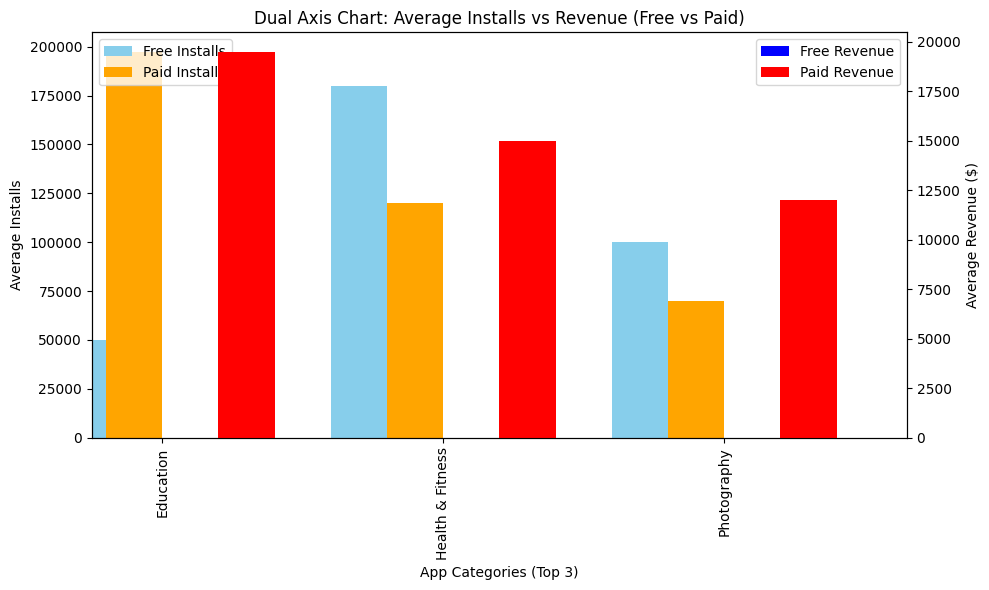

In [4]:
if current_hour == 13:
    top_categories = df['Category'].value_counts().nlargest(3).index
    filtered_df = df[df['Category'].isin(top_categories)]
    grouped = filtered_df.groupby(['Type', 'Category']).agg(
        Avg_Installs=('Installs', 'mean'),
        Avg_Revenue=('Revenue', 'mean')
    ).reset_index()
    pivot_installs = grouped.pivot(index='Category', columns='Type', values='Avg_Installs')
    pivot_revenue = grouped.pivot(index='Category', columns='Type', values='Avg_Revenue')
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()
    width = 0.4

    pivot_installs.plot(kind='bar', ax=ax1, position=1, width=width, color=['skyblue', 'orange'], legend=False)
    pivot_revenue.plot(kind='bar', ax=ax2, position=0, width=width, color=['blue', 'red'], legend=False)

    ax1.set_ylabel('Average Installs')
    ax2.set_ylabel('Average Revenue ($)')
    ax1.set_xlabel('App Categories (Top 3)')
    plt.title('Dual Axis Chart: Average Installs vs Revenue (Free vs Paid)')
    ax1.legend(['Free Installs', 'Paid Installs'], loc='upper left')
    ax2.legend(['Free Revenue', 'Paid Revenue'], loc='upper right')
    plt.tight_layout()
    plt.show()
else:
    print("Current IST time seen by Python:",
         now_current_hour)
    print("This graph is only available between 1 PM and 2 PM IST.")